# Parte 2: Automatización de Modelos de Crecimiento con Machine Learning

In [1]:
#librerias utilizadas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score
from scipy.stats import gompertz
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import fsolve

In [2]:
file = 'PRUEBA_TECNICA_AREA_DE_BIOECONOMIA.xlsx'
df = pd.read_excel(file,  sheet_name='PARTE_2', skiprows=range(0,3), usecols=lambda x: 'Unnamed' not in x,)
df.head(5)

,Grupo,Fecha Inicial,Fecha Final,Tiempo = Días,Peso Inicial Periodo (g)
0,STRAIN_C,2019-09-17,2019-09-30,13,129.15883
1,STRAIN_C,2019-09-17,2019-10-31,44,145.20931
2,STRAIN_C,2019-09-17,2019-11-30,74,246.35011
3,STRAIN_C,2019-09-17,2019-12-31,105,384.59903
4,STRAIN_C,2019-09-17,2020-01-31,136,547.73592


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4952 entries, 0 to 4951
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Grupo                     4952 non-null   object        
 1   Fecha Inicial             4952 non-null   datetime64[ns]
 2   Fecha Final               4952 non-null   datetime64[ns]
 3   Tiempo = Días             4952 non-null   int64         
 4   Peso Inicial Periodo (g)  4952 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 193.6+ KB


In [4]:
df.describe()

,Tiempo = Días,Peso Inicial Periodo (g)
count,4952.000000,4952.000000
mean,235.602787,1920.536369
std,145.784646,1626.495373
min,-335.000000,97.100000
25%,113.000000,496.211235
50%,235.000000,1452.853015
75%,358.000000,3151.432040
max,576.000000,8183.247360


In [ ]:
df[df['Tiempo = Días'] <0] #verificación de días negativos

,Grupo,Fecha Inicial,Fecha Final,Tiempo = Días,Peso Inicial Periodo (g)
4914,STRAIN_C,2019-12-01,2018-12-31,-335,235.89554
4915,STRAIN_C,2019-12-01,2019-01-31,-304,272.27277
4916,STRAIN_C,2019-12-01,2019-02-28,-276,401.42847
4917,STRAIN_C,2019-12-01,2019-03-31,-245,572.36273
4918,STRAIN_C,2019-12-01,2019-04-30,-215,759.80999
4919,STRAIN_C,2019-12-01,2019-05-31,-184,1048.65568
4920,STRAIN_C,2019-12-01,2019-06-30,-154,1321.60937
4921,STRAIN_C,2019-12-01,2019-07-31,-123,1711.89700
4922,STRAIN_C,2019-12-01,2019-08-31,-92,1870.57047
4923,STRAIN_C,2019-12-01,2019-09-30,-62,2163.04004


In [6]:
#Corrección de días con valor negativo
for index in range(len(df)):
    if df['Tiempo = Días'][index] < 0:
        df['Tiempo = Días'][index] *= -1  # 

C:\Users\earac\AppData\Local\Temp\ipykernel_27820\1852674343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tiempo = Días'][index] *= -1  #


In [ ]:
df[df['Tiempo = Días'] <0] #verificación de días negativos

,Grupo,Fecha Inicial,Fecha Final,Tiempo = Días,Peso Inicial Periodo (g)


In [8]:
import statsmodels.api as sm
X = np.array(list(df['Tiempo = Días'].values)) ##remove last data point to make prediction
y = np.array(list(df['Peso Inicial Periodo (g)'].values))  
# Adding a constant to our independent variable for the intercept
X_with_constant = sm.add_constant(X)
 
# Fit the OLS model
model_stats = sm.OLS(y, X_with_constant).fit()
 
# Print the summary of the model
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 2.855e+04
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:40:39   Log-Likelihood:                -38908.
No. Observations:                4952   AIC:                         7.782e+04
Df Residuals:                    4950   BIC:                         7.783e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -568.5426     17.204    -33.047      0.0

## Modelos

In [9]:
#modelo logístico
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))
#modelo gompertz
def gompertz_model(x,a,b,c):
    return c*np.exp(-b*np.exp(-x/a))

In [10]:
df1 = df.loc[0:14] #se toma el primer grupo para realizar pruebas

x = np.array(list(df1['Tiempo = Días'].values)) #variable independiente
y = np.array(list(df1['Peso Inicial Periodo (g)'].values))  #variable dependiente

y0 = y[0]
yf = y[-1]
print("Peso inicial: ", y0)
print("Peso final: ", yf)

Peso inicial:  129.15883
Peso final:  4361.68191


In [ ]:
print('>>> Modelo Logístico')
params, covariance = curve_fit(logistic_model,x,y) #optimización
a,b,c = params[0], params[1], params[2]
print("Los parámetros son: a= "+str(round(a,4)) + ", b= " + str(round(b,4)) + ", c= "+str(round(c,4)))
print("              ")
y_pred1 = logistic_model(x,a,b,c)
MSE = np.square(np.subtract(y,y_pred1)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n" + str(round(RMSE,4)))
print("R2 score: ", '{:.3f}'.format(r2_score(y,y_pred1)))

>>> Modelo Logístico
Los parámetros son: a= 0.4129, b= -1.1356, c= 1672.1674
              
Root Mean Square Error:
1358.4401
R2 score:  0.000


c:\Anaconda\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [ ]:
print('>>> Modelo Gompertz')
params, covariance = curve_fit(gompertz_model,x,y) #optimización
a1,b1,c1 = params[0], params[1], params[2]
print("Los parámetros son: a= "+str(round(a,4)) + ", b= " + str(round(b,4)) + ", c= "+str(round(c,4)))
print("              ")
y_pred2 = gompertz_model(x,a1,b1,c1)
MSE = np.square(np.subtract(y,y_pred2)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n" + str(round(RMSE,4)))
print("R2 score: ", '{:.3f}'.format(r2_score(y,y_pred2)))

>>> Modelo Gompertz
Los parámetros son: a= 0.4129, b= -1.1356, c= 1672.1674
              
Root Mean Square Error:
70.1011
R2 score:  0.997


C:\Users\earac\AppData\Local\Temp\ipykernel_27820\3138311326.py:6: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-b*np.exp(-x/a))
C:\Users\earac\AppData\Local\Temp\ipykernel_27820\3138311326.py:6: RuntimeWarning: overflow encountered in multiply
  return c*np.exp(-b*np.exp(-x/a))


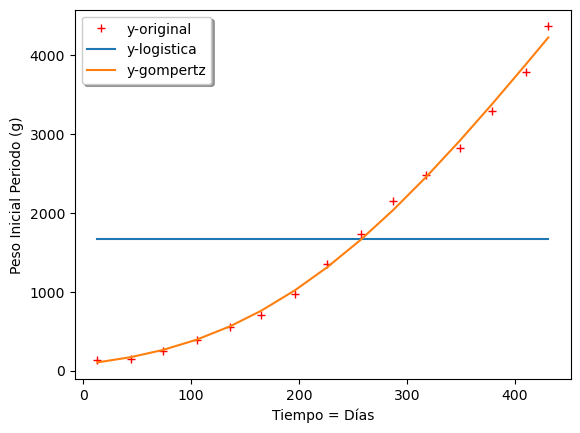

In [13]:
plt.plot(x, y, 'r+', label="y-original")
plt.plot(x, y_pred1, label="y-logistica")
plt.plot(x, y_pred2, label="y-gompertz")
plt.xlabel('Tiempo = Días')
plt.ylabel('Peso Inicial Periodo (g)')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show() 

## Generalizando el modelo

In [14]:
x = np.array(list(df['Tiempo = Días'].values)) 
y = np.array(list(df['Peso Inicial Periodo (g)'].values)) 

y0 = y[0]
yf = y[-1]
print("Peso inicial: ", y0)
print("Peso final: ", yf)

Peso inicial:  129.15883
Peso final:  5241.10677


In [ ]:
print('>>> Modelo Logístico')
params, covariance = curve_fit(logistic_model,x,y) #optimización
a,b,c = params[0], params[1], params[2]
print("Los parámetros son: a= "+str(round(a,4)) + ", b= " + str(round(b,4)) + ", c= "+str(round(c,4)))
print("              ")
y_pred1 = logistic_model(x,a,b,c)
MSE1 = np.square(np.subtract(y,y_pred1)).mean() 
RMSE1 = math.sqrt(MSE1)
print("Root Mean Square Error:\n" + str(round(RMSE1,4)))
print("R2 score: ", '{:.3f}'.format(r2_score(y,y_pred1)))


>>> Modelo Logístico
Los parámetros son: a= 104.8992, b= 367.2298, c= 6635.8372
              
Root Mean Square Error:
531.1173
R2 score:  0.893


In [ ]:
print('>>> Modelo Gompertz')
params, covariance = curve_fit(gompertz_model,x,y, maxfev=2000) #optimización
a1,b1,c1 = params[0], params[1], params[2]
print("Los parámetros son: a= "+str(round(a,4)) + ", b= " + str(round(b,4)) + ", c= "+str(round(c,4)))
print("              ")
y_pred2 = gompertz_model(x,a1,b1,c1)
MSE2 = np.square(np.subtract(y,y_pred2)).mean() 
RMSE2 = math.sqrt(MSE2)
print("Root Mean Square Error:\n" + str(round(RMSE2,4)))
print("R2 score: ", '{:.3f}'.format(r2_score(y,y_pred2)))

>>> Modelo Gompertz
Los parámetros son: a= 104.8992, b= 367.2298, c= 6635.8372
              
Root Mean Square Error:
531.8616
R2 score:  0.893


C:\Users\earac\AppData\Local\Temp\ipykernel_27820\3138311326.py:6: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-b*np.exp(-x/a))


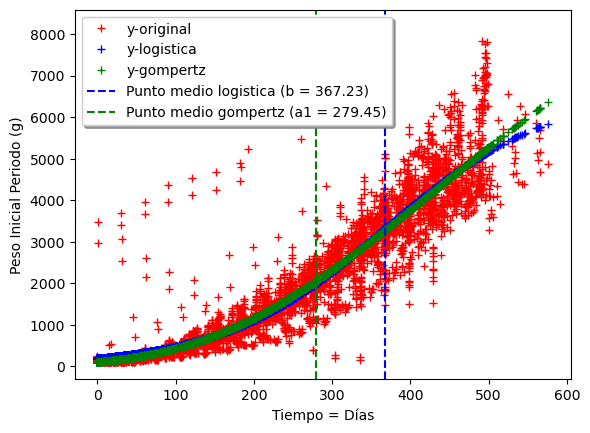

In [17]:
plt.plot(x, y, 'r+', label="y-original")
plt.plot(x, y_pred1, 'b+', label="y-logistica")
plt.plot(x, y_pred2, 'g+', label="y-gompertz")
plt.axvline(b, color='b', linestyle='--', label=f'Punto medio logistica (b = {b:.2f})')
plt.axvline(a1, color='g', linestyle='--', label=f'Punto medio gompertz (a1 = {a1:.2f})')
plt.xlabel('Tiempo = Días')
plt.ylabel('Peso Inicial Periodo (g)')
plt.legend(loc='best', shadow=True)
plt.show() 

In [18]:
info1 = pd.DataFrame({'Parámetro':["a", "b", "c", "RMSE", "R2 score"],
                      'y-logistic':[a, b, c, RMSE1, r2_score(y,y_pred1)], 
                      'y-gompertz':[a1, b1, c1, RMSE2, r2_score(y,y_pred2)]}).round(decimals=4)
info1

,Parámetro,y-logistic,y-gompertz
0,a,104.8992,279.4520
1,b,367.2298,4.6881
2,c,6635.8372,11553.1644
3,RMSE,531.1173,531.8616
4,R2 score,0.8933,0.8931


In [19]:
#considerando 367 días: 
y_pred1 = logistic_model(367,a,b,c)
print('El peso es: ', y_pred1 )

El peso es:  3314.2836727643016
